# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [64]:
import pandas as pd

In [65]:
data = pd.read_csv('train.csv')

In [66]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [67]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [68]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [69]:
data = data.fillna('')

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [70]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

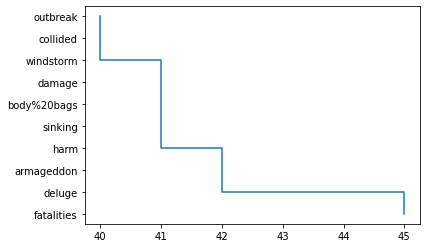

In [71]:
import matplotlib.pyplot as plt
i = data['keyword'].value_counts().index[1:11]
v = data['keyword'].value_counts().values[1:11]
plt.step(v, i)

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [72]:
cols = ['keyword', 'location', 'text']
data['text'] = data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
data

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' ar...,1
3,6,,,"13,000 people receive #wildfires evacuation ...",1
4,7,,,Just got sent this photo from Ruby #Alaska a...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse i...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...,1
7611,10872,,,Police investigating after an e-bike collide...,1


In [73]:
data = data.drop(['id', 'keyword', 'location'], axis = 1)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [74]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [75]:
train.head(5)

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train.text)

In [77]:
X

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [78]:
import re
t = str(cnt_vec.vocabulary_.keys())
def func(X):
    numb = len(re.findall('\S*[0-9]\S*', X))
    punc = len(re.findall('\S*[.,:;\?!()]\S*', X))
    hesh = len(re.findall('[#@]\S*', X))
    return numb, punc, hesh

In [79]:
func(t)

(3812, 18455, 0)

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [80]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
def tk(m):
    f = TweetTokenizer()
    return f.tokenize(m)
cnt_vec = CountVectorizer(tokenizer = tk)
X = cnt_vec.fit_transform(train.text)

In [81]:
X

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [82]:
import re
t = str(cnt_vec.vocabulary_.keys())
def func(X):
    numb = len(re.findall('\S*[0-9]\S*', X))
    punc = len(re.findall('\S*[.,:;\?!()]\S*', X))
    hesh = len(re.findall('[#@]\S*', X))
    return numb, punc, hesh

In [83]:
func(t)

(3946, 19672, 3155)

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [117]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [135]:
train.text.head(10)

1186    bridge%20collapse  Ashes 2015: AustraliaÛªs c...
4071    hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461    police Houston  CNN: Tennessee movie theater s...
5787    rioting  Still rioting in a couple of hours le...
7445    wounds Lake Highlands Crack in the path where ...
151     airplane%20accident Somewhere Out There Expert...
915     bloody Isolated City In World Perth 'I came to...
1305    burning  @JohnsonTionne except idk them?? it's...
2570    destroy he/him or she/her (ask) destroy the house
7399    wounded Maracay y Nirgua, Venezuela Police Off...
Name: text, dtype: object

In [124]:
s = 'Hello! ;) My name is Oleg #Russia You know?!?! :( I am sociable'

In [178]:
def token(X):
    X = X.lower()
    X = TweetTokenizer().tokenize(X)
    X = re.findall('#?[a-z]+', str(X))+re.findall('[.,:;\?!]*[()]+', str(X))
    noise = stopwords.words('english')
    for i in noise:
        if i in X:
            X.remove(i)
    stemmer = SnowballStemmer('english')      
    X = [stemmer.stem(w) for w in X]
    return X

In [179]:
token(s)

['hello', 'name', 'oleg', '#russia', 'know', 'sociabl', ';)', ':(']

In [180]:
token(str(train.text.head(10)))

['bridg',
 'collaps',
 'ash',
 'australia',
 'x',
 'c',
 'hail',
 'carol',
 'stream',
 'illinoi',
 'great',
 'michigan',
 'tec',
 'polic',
 'houston',
 'cnn',
 'tennesse',
 'movi',
 'theater',
 's',
 'riot',
 'still',
 'riot',
 'coupl',
 'hour',
 'le',
 'wound',
 'lake',
 'highland',
 'crack',
 'in',
 'path',
 'airplan',
 'accid',
 'somewher',
 'expert',
 'bloodi',
 'isol',
 'citi',
 'in',
 'world',
 'perth',
 'came',
 'burn',
 'johnsontionn',
 'except',
 'idk',
 's',
 'destroy',
 'ask',
 'destroy',
 'the',
 'hous',
 'wound',
 'maracay',
 'nirgua',
 'venezuela',
 'polic',
 'name',
 'text',
 'dtype',
 'object',
 '(',
 ')']

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
cnt_vec = CountVectorizer(tokenizer = token)
X_tr = cnt_vec.fit_transform(train.text)
X_ts = cnt_vec.transform(test.text)
clf = LogisticRegression()
clf.fit(X_tr, train.target)
pred = clf.predict(X_ts)
print(f1_score(test.target, pred))

0.7531064289573204


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [183]:
tf_idf = TfidfVectorizer(tokenizer = token)
X_tr = tf_idf.fit_transform(train.text)
X_ts = tf_idf.transform(test.text)
clf = LogisticRegression()
clf.fit(X_tr, train.target)
pred = clf.predict(X_ts)
print(f1_score(test.target, pred))

0.7450134770889488


In [184]:
X_tr

<5329x16766 sparse matrix of type '<class 'numpy.float64'>'
	with 70396 stored elements in Compressed Sparse Row format>

In [185]:
tf_idf = TfidfVectorizer(tokenizer = token, max_df = 0.9)
X_tr = tf_idf.fit_transform(train.text)
X_ts = tf_idf.transform(test.text)
clf = LogisticRegression()
clf.fit(X_tr, train.target)
pred = clf.predict(X_ts)
print(f1_score(test.target, pred))

0.7450134770889488


In [186]:
X_tr

<5329x16766 sparse matrix of type '<class 'numpy.float64'>'
	with 70396 stored elements in Compressed Sparse Row format>

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [187]:
from sklearn.feature_extraction.text import HashingVectorizer

In [188]:
hash_ = TfidfVectorizer(tokenizer = token, max_features = 5000)
X_tr = hash_.fit_transform(train.text)
X_ts = hash_.transform(test.text)
clf = LogisticRegression()
clf.fit(X_tr, train.target)
pred = clf.predict(X_ts)
print(f1_score(test.target, pred))

0.7499999999999999


In [189]:
X_tr

<5329x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 58308 stored elements in Compressed Sparse Row format>

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [201]:
hash_ = TfidfVectorizer(tokenizer = token, max_features = 7000)
X_tr = hash_.fit_transform(train.text)
X_ts = hash_.transform(test.text)
clf = LogisticRegression()
clf.fit(X_tr, train.target)
pred = clf.predict(X_ts)
print(f1_score(test.target, pred))

0.7504096122337519
